# Real estate data analysis (before & after Covid outbreak )

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

In [2]:
# loading property sales data file
ppt_df = pd.read_csv('Resources/vic-sales-postcovid.csv')

In [3]:
# calculating stats

avg_price = ppt_df.price.mean()
median_price = ppt_df.price.median()
std_price = ppt_df.price.std()
lowest_price = ppt_df.price.min()
highest_price = ppt_df.price.max()

lowest_priced_sub = ppt_df.loc[ppt_df['price']==lowest_price]['suburb'].values
highest_priced_sub = ppt_df.loc[ppt_df['price']==highest_price]['suburb'].values

In [4]:
# lowest & highest values property sold
print('---------------------------------------------------------------------------------')
print(f"The suburb, that has the lowest price property sold at AU$ {lowest_price:0,.0f} is {lowest_priced_sub[0]}.");
print(f"The suburb, that has the highest price property sold at AU$ {highest_price:0,.0f} is {highest_priced_sub[0]}.");
print('---------------------------------------------------------------------------------')

---------------------------------------------------------------------------------
The suburb, that has the lowest price property sold at AU$ 1,000 is Werribee.
The suburb, that has the highest price property sold at AU$ 8,000,000 is South Yarra.
---------------------------------------------------------------------------------


In [5]:
# Calculation of IQR and Outliers


quartiles = ppt_df.price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# print(f"The lower quartile of property price is: {lowerq:0,.0f}")
# print(f"The upper quartile of property price is: {upperq:0,.0f}")
# print(f"The interquartile range of property price is: {iqr:0,.0f}")
# print(f"The median of property price is: {quartiles[0.5]:0,.0f}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# print(f"* Values below {lower_bound:0,.0f} could be outliers.")
# print(f"* Values above {upper_bound:0,.0f} could be outliers.")

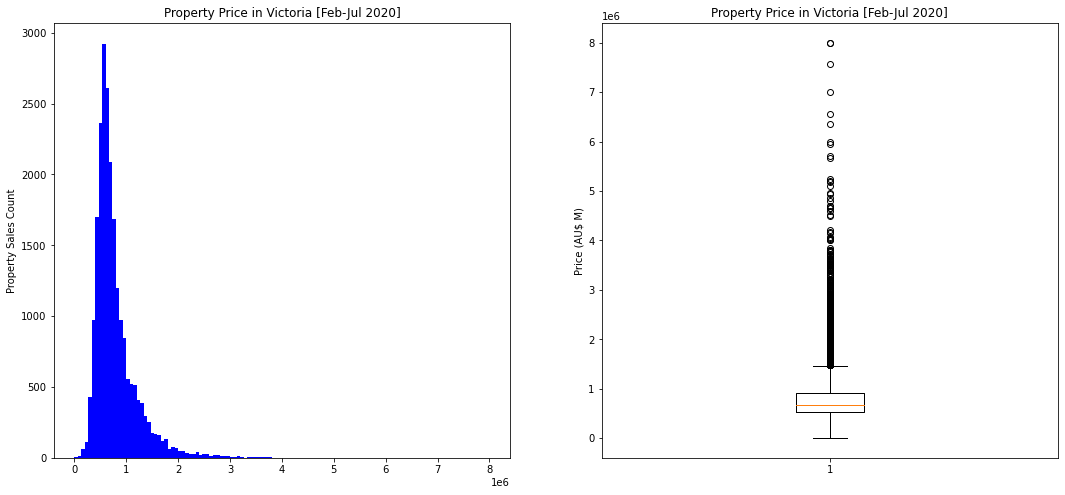

------------------------------------------------------------
The average of property price is: 790,517
The median of property price is: 667,000
The standard deviation of property price is: 447,614
------------------------------------------------------------
                                                             -------------------------------------------------
                                                              The lower quartile of property price is at 531,250
                                                              The upper quartile of property price is at 905,000
                                                            The interquartile range of property price is 373,750
                                                                   The median value of property price is 667,000
                                                               -------------------------------------------------
 * Values less than -29,375 or greater than 1,465,625 could be out

In [6]:
# histogram chart

plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1)

bins = 60
plt.hist(ppt_df.price, bins=120, facecolor='blue');
#plt.grid()
plt.ylabel("Property Sales Count")
plt.title('Property Price in Victoria [Feb-Jul 2020]')

# boxplot chart
plt.subplot(1, 2, 2)

plt.boxplot(ppt_df.price);
plt.title('Property Price in Victoria [Feb-Jul 2020]')
plt.ylabel('Price (AU$ M)')

plt.savefig('output/hist_box_ppty_price_covid.png')
plt.show()

print('------------------------------------------------------------')
print(f"The average of property price is: {avg_price:0,.0f}")
print(f"The median of property price is: {median_price:0,.0f}")
print(f"The standard deviation of property price is: {std_price:0,.0f}")                      
print('------------------------------------------------------------')

txt1 = "The lower quartile of property price is at"
txt2 = "The upper quartile of property price is at"
txt3 = "The interquartile range of property price is"
txt4 = "The median value of property price is"
txt5 = ' '
print(txt5.rjust(60),'-------------------------------------------------')
print(' ',txt1.rjust(102),f"{lowerq:0,.0f}" )
print(' ',txt2.rjust(102),f"{upperq:0,.0f}" )
print(' ',txt3.rjust(102), f"{iqr:0,.0f}" )
print(' ',txt4.rjust(102), f"{quartiles[0.5]:0,.0f}")
print(' ',txt5.rjust(60),'-------------------------------------------------')

print(f" * Values less than {lower_bound:0,.0f} or greater than {upper_bound:0,.0f} could be outliers.")


In [7]:
# removing the properties values less than $5,000
rm_index = ppt_df.loc[ppt_df.price < 5000]
ppt_df = ppt_df.drop(rm_index.index)

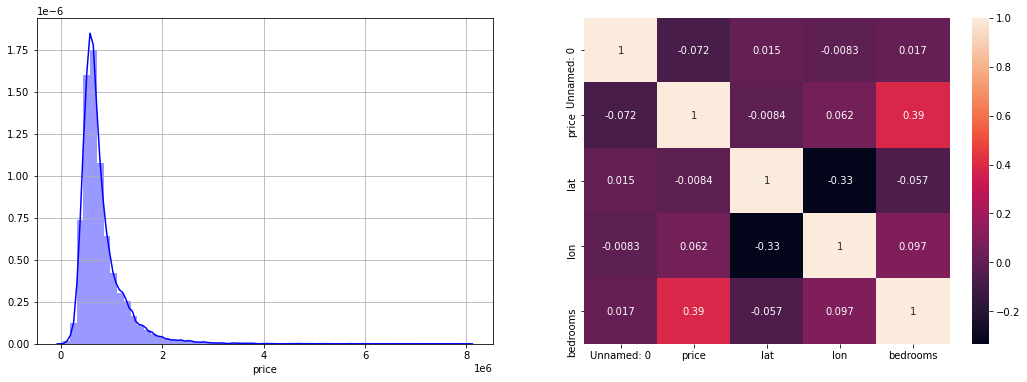

In [8]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

sns.distplot(ppt_df.price, bins = 60, color = 'blue');
plt.grid()

plt.subplot(1, 2, 2)
sns.heatmap(ppt_df.corr(), annot=True);

plt.show()

In [9]:
# loading covid dataset
covid_df = pd.read_excel('Resources/covid_data.xlsx')
covid_df.head()

,Local Government Area,Cases,Date
0,STONNINGTON,84,4042020
1,BANYULE,64,4042020
2,BOROONDARA,56,4042020
3,GREATER GEELONG,54,4042020
4,MORNINGTON PENINSULA,52,4042020


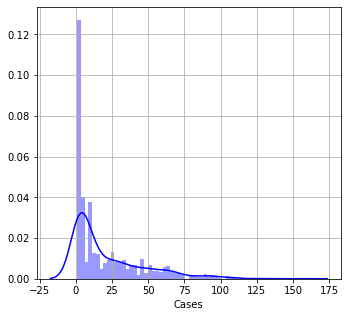

In [10]:
# having a look at the data

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(covid_df.Cases, bins = 60, color = 'blue')
plt.grid()
plt.show()


In [11]:
# convert data to suitable datatype
covid_df['Date'] = covid_df['Date'].astype(str)
covid_df['Cases'] = covid_df['Cases'].astype(int)

# function to store month data
covid_df['Month'] = covid_df.Date.apply(lambda x: x[x.rfind('2020')-2:x.rfind('2020')])

In [12]:
# grouping by date sold 
ppt_by_date = ppt_df.groupby('date_sold').count().reset_index()
#ppt_by_date.head()

# storing month sold
ppt_by_date['date_sold'] = ppt_by_date['date_sold'].astype(str);
ppt_by_date['month_sold'] = ppt_by_date.date_sold.apply(lambda x: x[5:7])
ppt_by_month = ppt_by_date.groupby('month_sold').sum().reset_index()
ppt_by_month

,month_sold,Unnamed: 0,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,LGA_Name
0,02,5811,5811,5811,5811,5811,5811,5811,5811,5811,5811,5811,5811
1,03,5455,5455,5455,5455,5455,5455,5455,5455,5455,5455,5455,5455
2,04,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090
3,05,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128
4,06,3394,3394,3394,3394,3394,3394,3394,3394,3394,3394,3394,3394
5,07,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450,1450


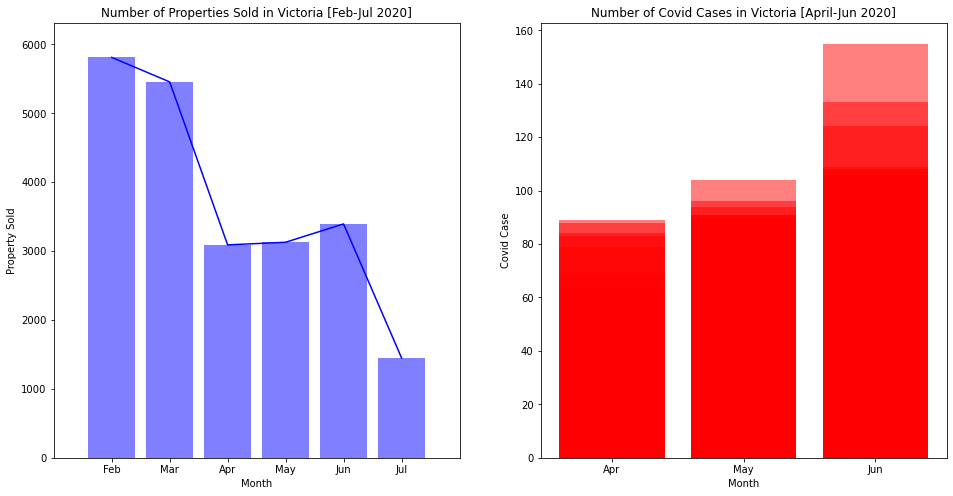

In [13]:
# plotting property sold and covid cases charts

plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)

y_axis = ppt_by_month.suburb
x_axis = ppt_by_month.month_sold
plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align="center")
tick_locations = [v for v in x_axis]
plt.xticks(tick_locations, ["Feb", "Mar", "Apr", "May", "Jun","Jul"])
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+500)
plt.xlabel('Month')
plt.ylabel('Property Sold')
plt.title('Number of Properties Sold in Victoria [Feb-Jul 2020]')
plt.plot(x_axis, y_axis, color='blue')


# covid cases chart
plt.subplot(1, 2, 2)
x_axis = covid_df['Month'].astype(int)
y_axis = covid_df.Cases
 
plt.bar(x_axis, y_axis, color='red', alpha=0.5, align="center")
tick_locations = [4, 5, 6]
plt.xticks(tick_locations, ["Apr", "May", "Jun"])
#plt.xlim(5, len(x_axis)+5)
#plt.ylim(0, max(y_axis) + 5)
plt.xlabel('Month')
plt.ylabel('Covid Case')
plt.title('Number of Covid Cases in Victoria [April-Jun 2020]')
plt.show()


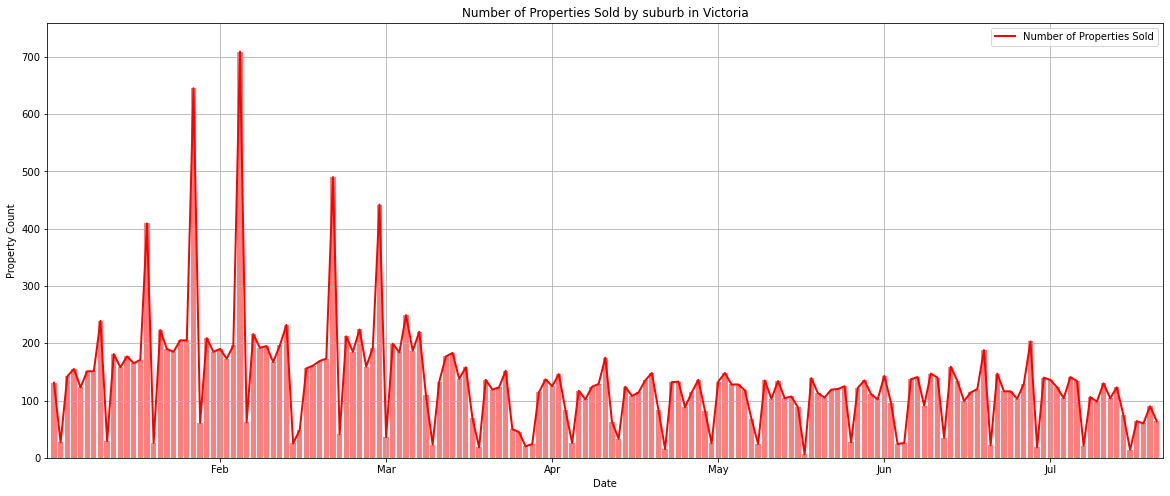

In [14]:
# property sold by date
y_axis = ppt_by_date.suburb
x_axis = ppt_by_date.date_sold

plt.figure(figsize=(20,8))
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

tick_locations = [25, 50, 75, 100, 125, 150]
plt.xticks(tick_locations, ["Feb", "Mar", "Apr", "May", "Jun","Jul"])
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+50)
plt.xlabel('Date')
plt.ylabel('Properties Count')
plt.title('Number of Properties Sold by suburb in Victoria')


x = ppt_by_date.date_sold
y = ppt_by_date.suburb
plt.plot(x, y, color='red', label='Number of Properties Sold', linewidth= 2)
plt.ylabel('Property Count')
plt.xlabel('Date')
plt.title('Number of Properties Sold by suburb in Victoria')
plt.legend(loc='best')
plt.grid()

plt.savefig('output/num_ppty_sold_by_month.png')
plt.show()

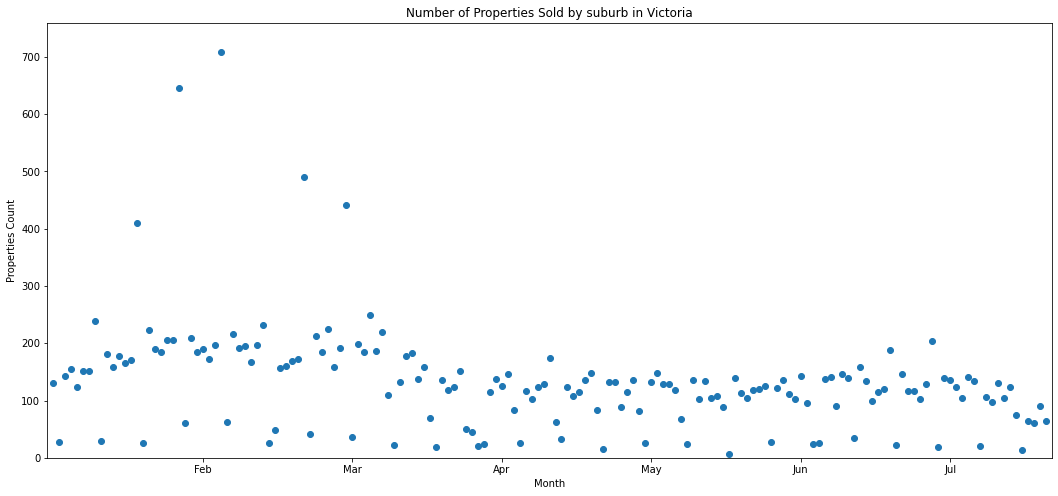

In [15]:
# scatter chart
x = ppt_by_date.date_sold
y = ppt_by_date.suburb

plt.figure(figsize=(18,8))
plt.scatter(x, y)
tick_locations = [25, 50, 75, 100, 125, 150]
plt.xticks(tick_locations, ["Feb", "Mar", "Apr", "May", "Jun","Jul"])

plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+50)
plt.xlabel('Month')
plt.ylabel('Properties Count')
plt.title('Number of Properties Sold by suburb in Victoria')

plt.savefig('output/scatter_ppty_sold_covid.png')
plt.show()

In [16]:
# reading property data before Covid outbreak
ppt_pre_df = pd.read_csv('Resources/vic-sales-precovid.csv')

ppt_pre_df.head()

,Unnamed: 0,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode
0,0,2018-09-02,1123000.0,Elsternwick,Melbourne,VIC,-37.880265,145.002303,3,townhouse,VIC857,VIC89,3185.0
1,1,2018-09-02,460000.0,Rosebud,Melbourne,VIC,-38.389428,144.924085,3,house,VIC2199,VIC125,3939.0
2,2,2018-09-02,450000.0,Cheltenham,Melbourne,VIC,-37.964607,145.053552,2,unit,VIC537,VIC98,3192.0
3,3,2018-09-02,575000.0,Keysborough,Melbourne,VIC,-38.004906,145.165695,2,townhouse,VIC1334,VIC91,3173.0
4,4,2018-09-02,620000.0,Pakenham,Melbourne,VIC,-38.058174,145.454603,4,house,VIC2023,VIC161,3810.0


In [17]:
# reading the csv file with local government name 
suburb_lga_df = pd.read_csv('output/suburb_lga_postcode_df.csv')

# change the columns name (suburb) to match with sorted_ppt_df
suburb_lga_df = suburb_lga_df.rename(columns={'Suburb':'suburb'})

In [18]:
# limiting the time period to Feb-Jul, 2019 [.isin(['2019-02-02', '2019-07-15'])]
reduced_ppt_df = ppt_pre_df[ppt_pre_df['date_sold'] > '2019-01-02'] 
reduced_ppt_df = reduced_ppt_df[ppt_pre_df['date_sold'] < '2019-07-15' ].reset_index()

#reduced_ppt_df.reset_index()

C:\Users\home\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# merging with suburb_lga file to acquire the lga name
merged_reduced_df = pd.merge(reduced_ppt_df, suburb_lga_df, how = 'left', on = 'suburb', suffixes = '_x' )

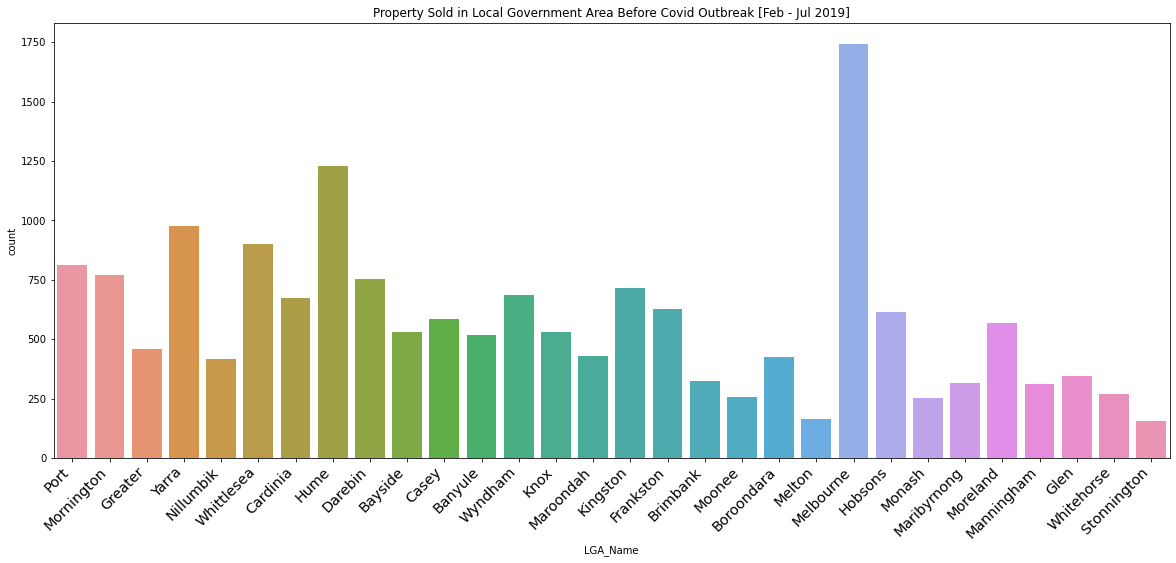

In [20]:
plt.figure(figsize=(20,8))

# seting xticklabel
plt.xticks(rotation=45,horizontalalignment='right', fontweight='light', fontsize='x-large');
plt.xlabel('Local Government Area')
plt.ylabel('Number of Property Sold')
plt.title('Property Sold in Local Government Area Before Covid Outbreak [Feb - Jul 2019]')
sns.countplot(merged_reduced_df.LGA_Name);

plt.savefig('output/lga_popu_pre_covid [Feb-Jul-2019].png')
plt.show()

In [21]:
# grouping and analyze data by lga after Covid outbreak

In [22]:
# sorting by date sold and local government area
sorted_ppt_df = ppt_df.sort_values(by=['date_sold','lga_pid'])
sorted_ppt_df = sorted_ppt_df[['date_sold','lga_pid','suburb','price']]

In [23]:
merged_sub_df = pd.merge(sorted_ppt_df, suburb_lga_df, how = 'left', on = 'suburb', suffixes = '_x' )

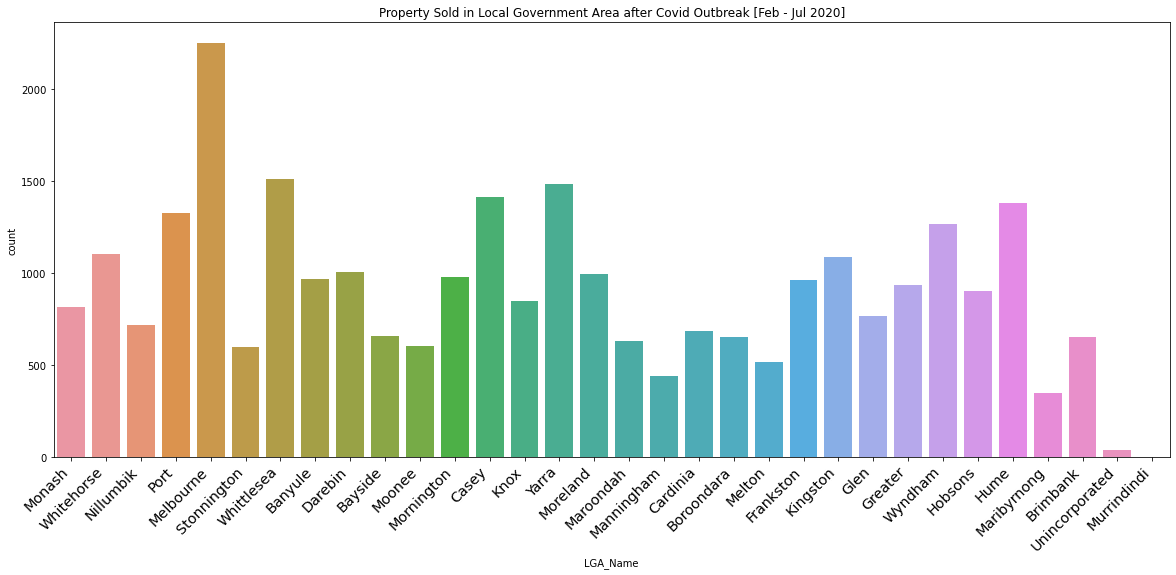

In [24]:
# plotting the property sales by local government area

plt.figure(figsize=(20,8))

# seting xticklabel
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large');
plt.xlabel('Local Government Area')
plt.ylabel('Number of Property Sold')
plt.title('Property Sold in Local Government Area after Covid Outbreak [Feb - Jul 2020]')
sns.countplot(merged_sub_df.LGA_Name);

plt.savefig('output/lga_popu_covid.png')
plt.show()

In [25]:
# overall property sales volume before covid outbreak [Feb 2018 till Jan 2020]

In [26]:
merged_sub_df = pd.merge(ppt_pre_df, suburb_lga_df, how = 'left', on = 'suburb', suffixes = '_x' )

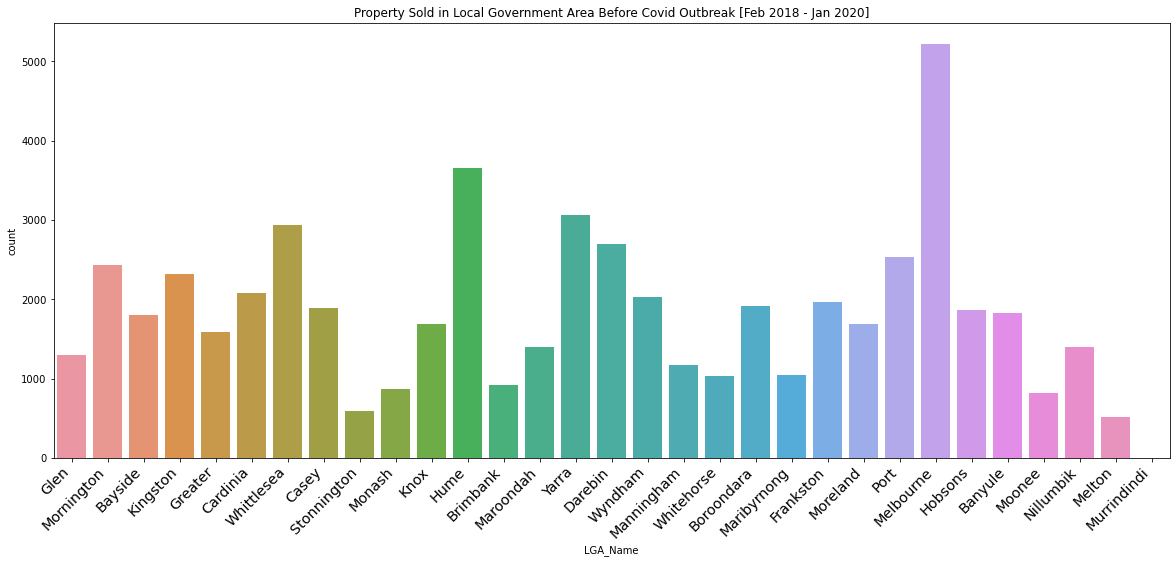

In [27]:
plt.figure(figsize=(20,8))

# seting xticklabel
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large');
plt.title('Property Sold in Local Government Area Before Covid Outbreak [Feb 2018 - Jan 2020]')
sns.countplot(merged_sub_df.LGA_Name);

plt.savefig('output/lga_popu_pre_covid [2018-2019].png')
plt.show()